# <u>Van's Class Notes (normal tests, t-tests, u-tests, boxplots)</u>

## Histograms
* A **histogram** is a visual representation of the distribution of *quantitative* data.
* Range on the x-axis (value) depends on what type of data you have.
* Range on the y-axis (count) would be the from 0 to the sample-size (max)
* **x** (data) has to be at-least ordinal. You can also use discrete or continuous data.
    * **Ordinal data** - a category of data that can be *ranked* in a natural order.
        * Example: 1st, 2nd, 3rd place...
    * **Discrete data** - data that you can count.
        * Example: $$ in the bank. There is a bound of how small/large something is (you can't really go below a penny).
    * **Continuous data** - data that can take on any value
        * Example: heights, weights, temperature (sometimes)
    * Ordinal vs Continuous
        * Example: Running a marathon:
        * |ID      |Place   |Time    |
          |--------|--------|--------|
          |1       |2nd       |5.0 min  |
          |2       |3rd       |10.5 min |
          |3       |1st       |4.9 min  |
        * *Ordinal:* The "distance" between 1st and 2nd place is 1. However, we can not tell how much better 1st vs 2nd is.
        * *Continuous:* We can still figure out the order, and we can also figure out by how much.

#### What type of data does *not* work with histograms?
* **qualitative/categorical data**. This is because the data is unordered. They would just become bar charts at one point.

#### Why are histograms important?
* Gives a visual idea of the distribution of the data (min, max, range, etc.). Gives a visual to see if the data is *normally distributed*.
    * **Normal Distribution** - a symmetrical bell=shaped graph where means/medians are centered. 1SD = 68%, 2SD = 95%, 3SD = 99.7%
        * The normal distribution is key to the *central limit theorem*. Averages calculated from an independent, identically distributed random variable have approximately normal distribution. The sampling distribution of the mean will always follow a normal distribution when the sample size is sufficiently large.
        * Take 10 random values and take the average. Do this 100 times. It will be centered after the larger n at the same place as smaller n (if normally distributed)
        * Assumed in many tests that the data is normal
        * *Normality test* - used to test if the data is normal
            * Visual way: You can look at histograms or qq plots (often used in bio. Normal theoretical quantile vs normal data quantile. Remember flow cytometry. Closer to the linear line is better)

## Box-plots and T-tests
* Box-plots is another method to demonstrate distribution of your data. Kind of like a histogram turned on the side. A distribution on top of the box plots are called **violin plots**.
    * x-axis=group, y-axis=value
    * Q2 is the line in the box, and the median.
    * Q0 is the minimum level excluding/without outliers.
    * Q1 is the median of the lower half of all the data
    * Q3 is the median of the upper half
    * Q4 is the maximum level excluding/without outliers
* Outliers are data points that lie outside of where the data should normally be. Can be calculated based on the **inter quartile range**.
    * **Q3 - Q1 = IQ** (inter quartile range). You can use this to calculate outliers. then you can remove outliers based on your results.
    * Removing outliers. Then you can get the Q0 and Q4.
        Mild: < Q1 - 1.5\*IQ OR > Q3 + 1.5\*IQ
        Extreme: < Q1 - 3.0\*IQ OR Q3 + 3.0\*IQ
        
#### T-tests
* A statistical test is used to test the means of two (usually) groups. Whether the difference between the response (data points) of two groups is statistically significant.
* t = [mean of group 1 - mean of group 2] / sqrt([sample variance squared of group 1/sample size] - [sample variance squared of group 2/sample size]).
* T-tests are parametric tests (normal). If you don't have normal data, you can use non-parametric t-tests.
* Non-parametric t-test
    * Mann-whitney u-test
        * Rank the data
            * Group 1 = [8  9, 10, 60]
            * Group 2 = [14, 61, 72, 80]
            * Group 1 + Group 2 = [8(1), 9(1), 10(1), 14(2), 6(1), 61(2), 72(2), 80(2)]
            * Rank = [1, 2, 3, 4, 5, 6, 7, 8]
            * Group 1 Rank: [1, 2, 3, 5] (can get rank mean)
            * Group 2 Rank: [4, 6, 7, 8] (can get rank mean)
        * Use the ranking orders to calculate the difference

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [15]:
x1 = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7] # Some made up normal data
x2 = [5, 5, 5, 5, 5, 11.9, 3, 3, 2000, 76, 2000, 2000, 2000] # Some made-up non-normal data
#plt.hist(x1, bins=7) # python defaults to 10 bins

# Testing normal. In this case, having a small p-value is bad b/c it means that 
print(stats.normaltest(x1))
print(stats.normaltest(x2))


NormaltestResult(statistic=1.156472261276945, pvalue=0.5608868256398167)
NormaltestResult(statistic=4.52087411280597, pvalue=0.10430488767222262)


/Users/evangelinekim/miniconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  k, _ = kurtosistest(a, axis)
/Users/evangelinekim/miniconda3/envs/myenv/lib/python3.12/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  k, _ = kurtosistest(a, axis)


In [17]:
# Running t-test
t_test = stats.ttest_ind(x1, x2)
print(t_test) #TtestResult(statistic=-1.339562121784297, pvalue=0.19293554288233983, df=24.0)

# Running non-parametric u-test
u_test = stats.mannwhitneyu(x1, x2)
print(u_test)

TtestResult(statistic=-2.611299034596456, pvalue=0.014547109989239996, df=27.0)
MannwhitneyuResult(statistic=45.5, pvalue=0.009769608185406446)


NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)
NormaltestResult(statistic=221.33178660723647, pvalue=8.677871269019617e-49)


(array([ 1.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  4.,  0.,  0.,  2.,  0.,
         5.,  0.,  0.,  6.,  0.,  0., 10.,  0.,  0.,  9.,  0.,  0.,  4.,
         0.,  1.,  0.,  0.,  6.,  0.,  0.,  7.,  0.,  0.,  6.,  0.,  8.,
         0.,  0.,  7.,  0.,  0.,  3.,  0.,  0.,  6.,  0.,  0.,  6.,  0.,
         4.,  0.,  0.,  9.,  0.,  0.,  7.,  0.,  0.,  5.,  0.,  2.,  0.,
         0.,  8.,  0.,  0.,  3.,  0.,  0.,  4.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  3.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  1.]),
 array([4.3  , 4.336, 4.372, 4.408, 4.444, 4.48 , 4.516, 4.552, 4.588,
        4.624, 4.66 , 4.696, 4.732, 4.768, 4.804, 4.84 , 4.876, 4.912,
        4.948, 4.984, 5.02 , 5.056, 5.092, 5.128, 5.164, 5.2  , 5.236,
        5.272, 5.308, 5.344, 5.38 , 5.416, 5.452, 5.488, 5.524, 5.56 ,
        5.596, 5.632, 5.668, 5.704, 5.74 , 5.776, 5.812, 5.848, 5.884,
        5.92 , 5.956, 5.992, 6.028, 6.064, 6.1  , 6.136, 6.172, 6.208,
        

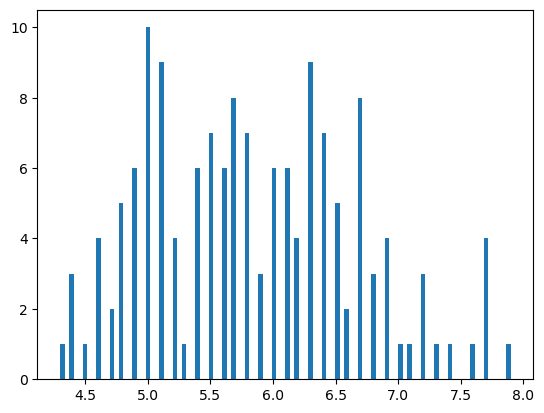

In [20]:
data = pd.read_csv('data/Iris.csv', sep = ",")
x1 = data["SepalLengthCm"]
x2 = data["PetalLengthCm"]

# Test for normality
print(stats.normaltest(x1)) # closer to normal than x2
print(stats.normaltest(x2)) # very small p-value, so not normal

# Plotting both
plt.hist(x1, bins=100)
#plt.hist(x2)

{'whiskers': [<matplotlib.lines.Line2D at 0x161e02f60>,
 'caps': [<matplotlib.lines.Line2D at 0x161e03560>,
 'boxes': [<matplotlib.lines.Line2D at 0x161dd2a80>],
 'medians': [<matplotlib.lines.Line2D at 0x161e03a40>],
 'fliers': [<matplotlib.lines.Line2D at 0x161e03d10>],
 'means': []}

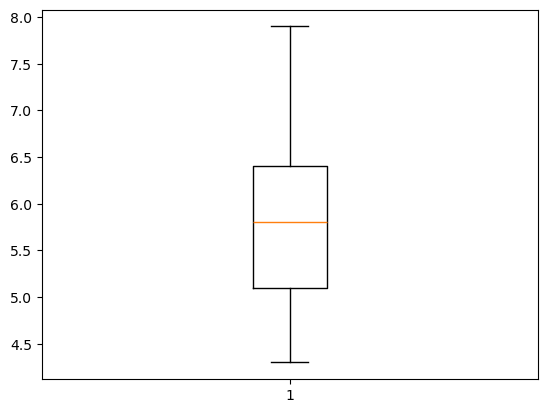

In [21]:
# Box/violin plots
plt.boxplot(x1)

{'whiskers': [<matplotlib.lines.Line2D at 0x1628325d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1628329c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x162832390>],
 'medians': [<matplotlib.lines.Line2D at 0x162832f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x162833140>],
 'means': []}

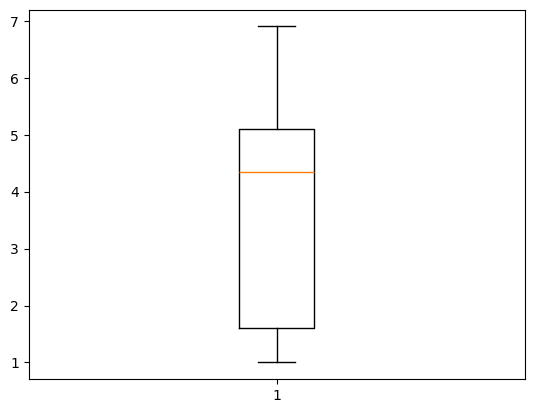

In [22]:
plt.boxplot(x2) # doesn't tell much

{'bodies': [<matplotlib.collections.PolyCollection at 0x16287ef30>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x162804f20>,
 'cmins': <matplotlib.collections.LineCollection at 0x1628eecf0>,
 'cbars': <matplotlib.collections.LineCollection at 0x162902e10>}

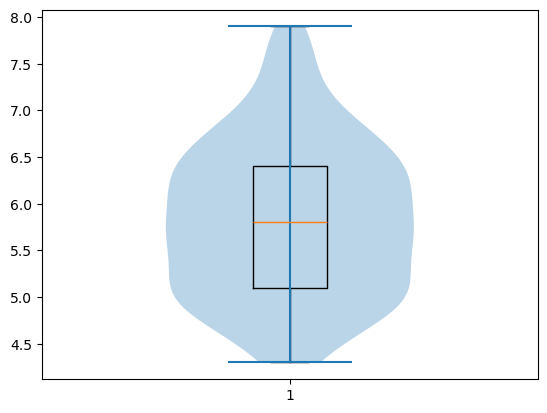

In [24]:
plt.boxplot(x1)
plt.violinplot(x1)

{'bodies': [<matplotlib.collections.PolyCollection at 0x162964da0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1629456d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x162833cb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x162996d20>}

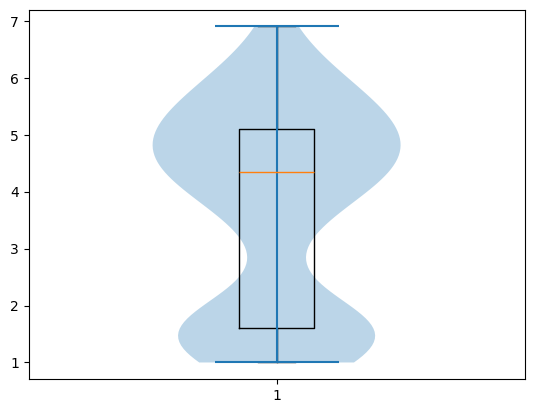

In [25]:
plt.boxplot(x2)
plt.violinplot(x2)
# Now you can see the lack of normal distribution that you don't get in just the box-plot

## AL-3

NormaltestResult(statistic=5.735584236235733, pvalue=0.05682424941067306)
NormaltestResult(statistic=3.576642160069695, pvalue=0.16724071787237138)
NormaltestResult(statistic=221.33178660723647, pvalue=8.677871269019617e-49)
NormaltestResult(statistic=136.77701788227716, pvalue=1.991810150572055e-30)


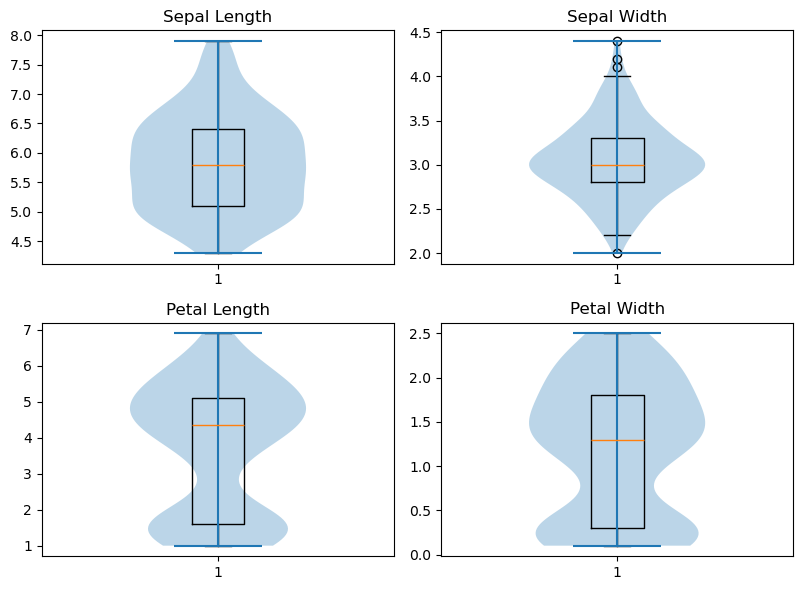

In [34]:
x1 = data["SepalLengthCm"]
x2 = data["SepalWidthCm"]
x3 = data["PetalLengthCm"]
x4 = data["PetalWidthCm"]

print(stats.normaltest(x1))
print(stats.normaltest(x2))
print(stats.normaltest(x3))
print(stats.normaltest(x4))

fig, axs = plt.subplots(2,2, figsize=(8, 6))

# x1
axs[0,0].set_title("Sepal Length")
axs[0,0].boxplot(x1)
axs[0,0].violinplot(x1)

# x2
axs[0,1].set_title("Sepal Width")
axs[0,1].boxplot(x2)
axs[0,1].violinplot(x2)

# x3
axs[1,0].set_title("Petal Length")
axs[1,0].boxplot(x3)
axs[1,0].violinplot(x3)

# x4
axs[1,1].set_title("Petal Width")
axs[1,1].boxplot(x4)
axs[1,1].violinplot(x4)

plt.tight_layout()



In [ ]:
# Running t-test
t_test = stats.ttest_ind(x1, x2)
print(t_test) #TtestResult(statistic=-1.339562121784297, pvalue=0.19293554288233983, df=24.0)

# Running non-parametric u-test
u_test = stats.mannwhitneyu(x1, x2)
print(u_test)

TtestResult(statistic=-2.611299034596456, pvalue=0.014547109989239996, df=27.0)
MannwhitneyuResult(statistic=45.5, pvalue=0.009769608185406446)


In [ ]:
### Creating Histograms

# Making TWO histogram subplots (2x2), one for leaf-width and one for leaf-length
fig_length, axs_length = plt.subplots(2, 2, figsize=(8, 6), gridspec_kw={'hspace': 0.4}) # https://stackoverflow.com/questions/31484273/spacing-between-some-subplots-but-not-all
fig_width, axs_width = plt.subplots(2, 2, figsize=(8, 6))

for name, group_data in groups:
    lengths = group_data.PetalLengthCm
    widths = group_data.PetalWidthCm

    # Get axes position for each flower subplot
    if name == 'Iris-setosa':
        ax_length = axs_length[0, 0]
        ax_width = axs_width[0, 0]
    elif name == 'Iris-versicolor':
        ax_length = axs_length[0, 1]
        ax_width = axs_width[0, 1]
    elif name == 'Iris-virginica':
        ax_length = axs_length[1, 0]
        ax_width = axs_width[1, 0]
    else:
        continue

    # Plotting length/width histograms for each flower
    ax_length.hist(lengths)
    ax_length.set_title(name)
    ax_length.set_xlabel("Length (cm)")
    ax_length.set_ylabel("Counts")

    ax_width.hist(widths)
    ax_width.set_title(name)
    ax_width.set_xlabel("Width (cm)")
    ax_width.set_ylabel("Counts")

# Add stuff for subplot [1, 1] (all flowers combined)
axs_length[1, 1].hist(data["PetalLengthCm"])
axs_length[1, 1].set_title("All")
axs_length[1, 1].set_xlabel("Length (cm)")
axs_length[1, 1].set_ylabel("Counts")

axs_width[1, 1].hist(data["PetalWidthCm"])
axs_width[1, 1].set_title("All")
axs_width[1, 1].set_xlabel("Width (cm)")
axs_width[1, 1].set_ylabel("Counts")

# Other aesthetics
fig_length.suptitle("Petal Lengths", fontsize=16)
fig_width.suptitle("Petal Widths", fontsize=16)
plt.tight_layout()